# Data Import

In [25]:
import pandas as pd

df = pd.read_csv("lawas/lawas-rainfall.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"],format="%Y-%m-%d %H:%M:%S")
df.set_index("DateTime",inplace=True)

In [26]:
print(df.head())

                     Rainfall  TOTAL  ClimAdjust  ANOM  Temperature  DewPoint  \
DateTime                                                                        
2002-08-01 00:00:00       0.0  27.72       26.91  0.81         79.0      75.0   
2002-08-01 01:00:00       0.0  27.72       26.91  0.81         79.0      73.0   
2002-08-01 02:00:00       0.0  27.72       26.91  0.81         77.0      75.0   
2002-08-01 03:00:00       0.0  27.72       26.91  0.81         77.0      73.0   
2002-08-01 04:00:00       0.0  27.72       26.91  0.81         79.0      73.0   

                     Humidity  WindSpeed  Pressure  Wind      Condition  
DateTime                                                                 
2002-08-01 00:00:00      89.0        3.0     29.69     E  Mostly Cloudy  
2002-08-01 01:00:00      83.0        2.0     29.69     E  Mostly Cloudy  
2002-08-01 02:00:00      94.0        2.0     29.66     W  Mostly Cloudy  
2002-08-01 03:00:00      89.0        0.0     29.66  CALM  Most

# Data Visualization

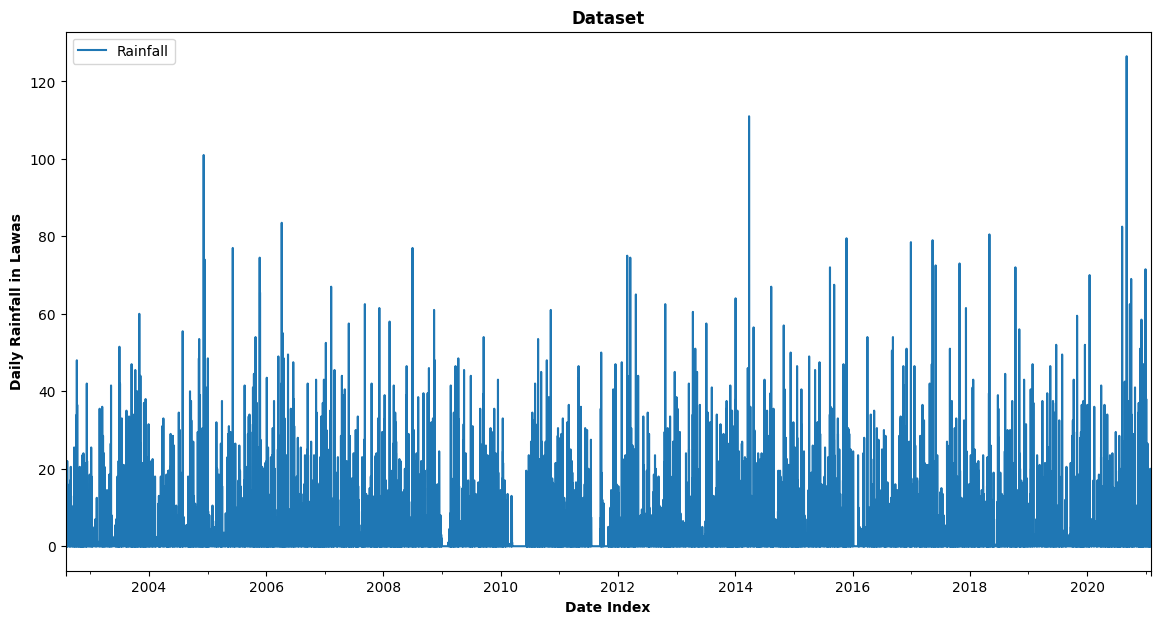

In [27]:
# Rainfall data
import matplotlib.pyplot as plt

df.reset_index().plot(x="DateTime", y="Rainfall",figsize=(14,7))
plt.ylabel('Daily Rainfall in Lawas',fontweight='bold')
plt.xlabel('Date Index',fontweight='bold')
plt.title('Dataset',fontweight='bold')
# plt.xlim(pd.Timestamp("2021-02-01"), pd.Timestamp("2022-02-01"))

plt.show()

In [28]:
df.describe().T

count       mean       std    min    25%    50%    75%     max
Rainfall     162193.0   0.435053  2.876733   0.00   0.00   0.00   0.00  126.50
TOTAL        162193.0  27.075431  0.955017  24.87  26.38  27.18  27.72   29.41
ClimAdjust   162193.0  27.069457  0.481138  26.45  26.70  26.80  27.29   27.94
ANOM         162193.0   0.005896  0.836538  -1.69  -0.57  -0.03   0.48    2.71
Temperature  162193.0  82.201427  3.802638  70.00  79.00  82.00  84.00   95.00
DewPoint     162193.0  76.124247  2.121707  34.00  75.00  77.00  77.00  133.00
Humidity     162193.0  82.759253  9.914374  14.00  75.00  84.00  89.00  100.00
WindSpeed    162193.0   4.223145  3.348789   0.00   2.00   3.00   6.00   83.00
Pressure     162193.0  29.694080  0.092552   0.00  29.66  29.69  29.72   29.98

In [29]:
df.isnull().sum()

Rainfall       0
TOTAL          0
ClimAdjust     0
ANOM           0
Temperature    0
DewPoint       0
Humidity       0
WindSpeed      0
Pressure       0
Wind           0
Condition      0
dtype: int64

                     Rainfall  TOTAL  ClimAdjust  ANOM  Temperature  DewPoint  \
DateTime                                                                        
2002-08-01 00:00:00       0.0  27.72       26.91  0.81         79.0      75.0   
2002-08-01 01:00:00       0.0  27.72       26.91  0.81         79.0      73.0   
2002-08-01 02:00:00       0.0  27.72       26.91  0.81         77.0      75.0   
2002-08-01 03:00:00       0.0  27.72       26.91  0.81         77.0      73.0   
2002-08-01 04:00:00       0.0  27.72       26.91  0.81         79.0      73.0   

                     Humidity  WindSpeed  Pressure  
DateTime                                            
2002-08-01 00:00:00      89.0        3.0     29.69  
2002-08-01 01:00:00      83.0        2.0     29.69  
2002-08-01 02:00:00      94.0        2.0     29.66  
2002-08-01 03:00:00      89.0        0.0     29.66  
2002-08-01 04:00:00      83.0        1.0     29.63  


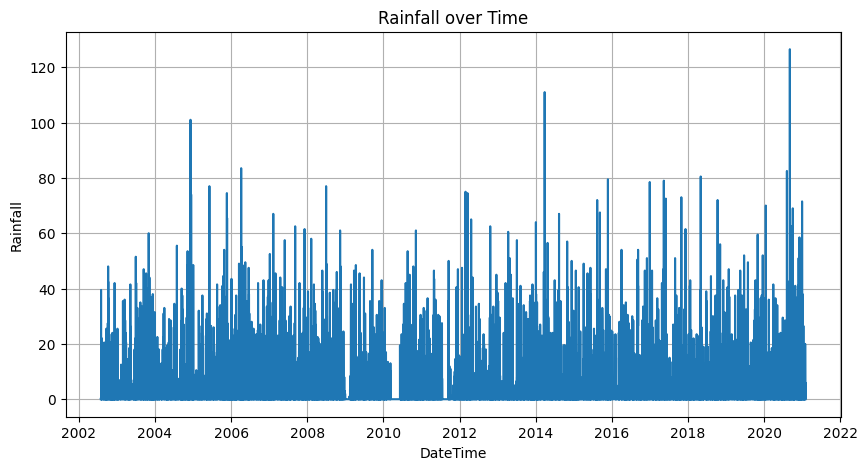

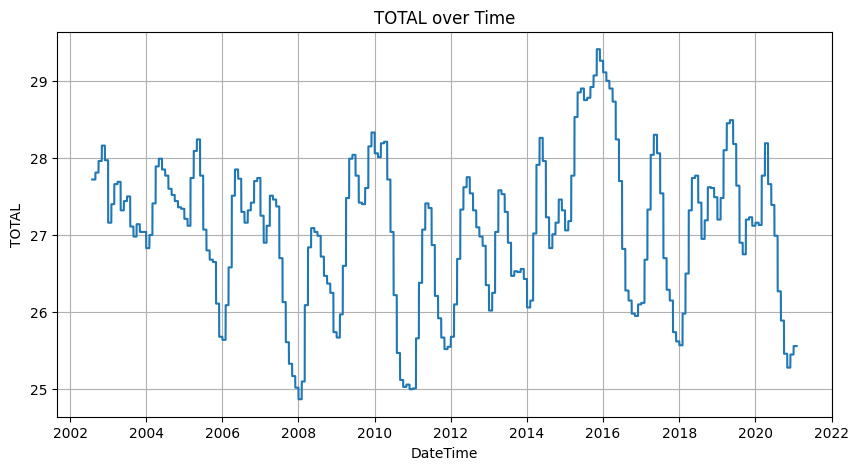

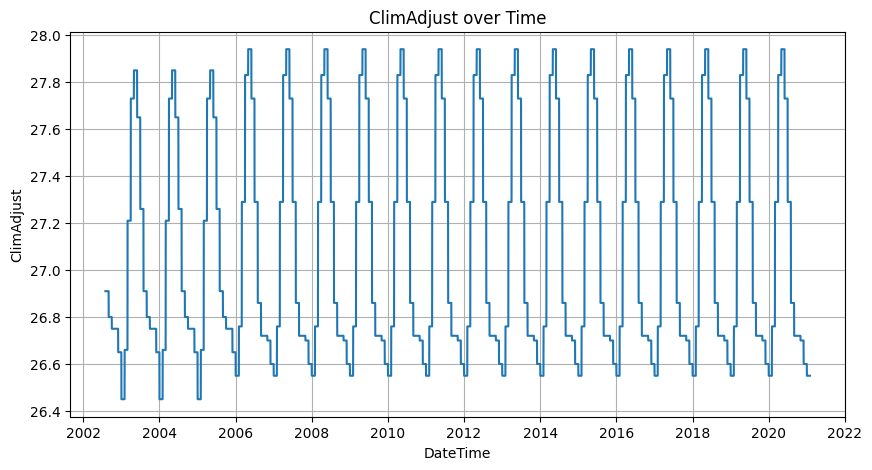

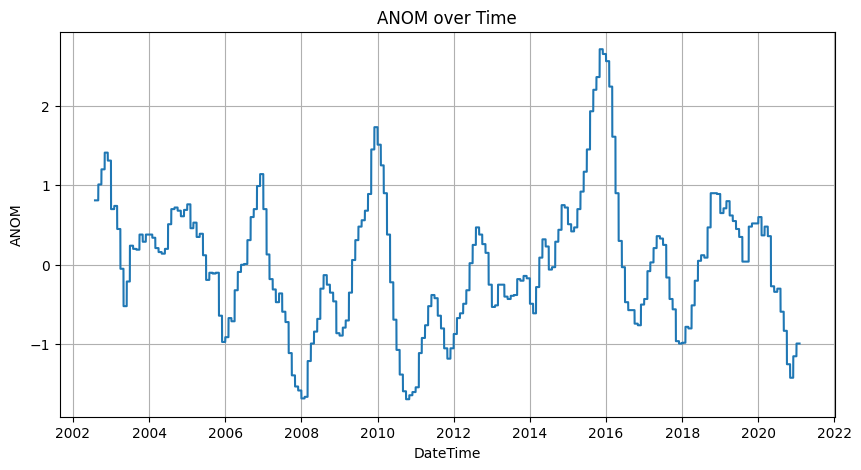

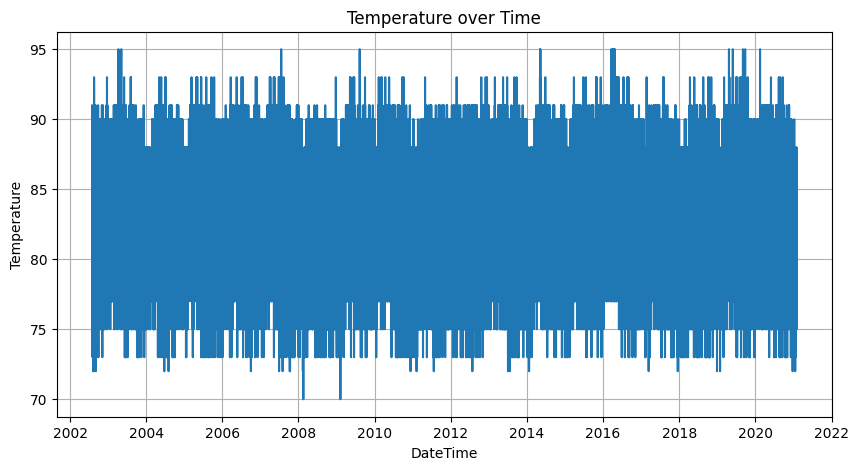

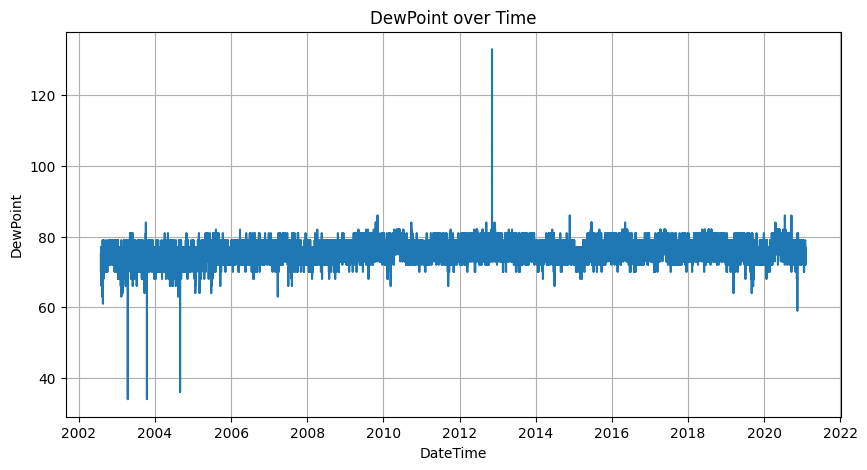

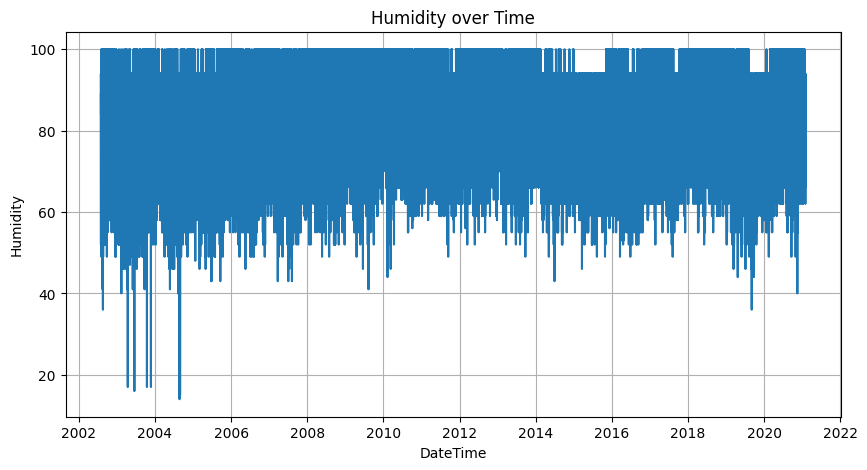

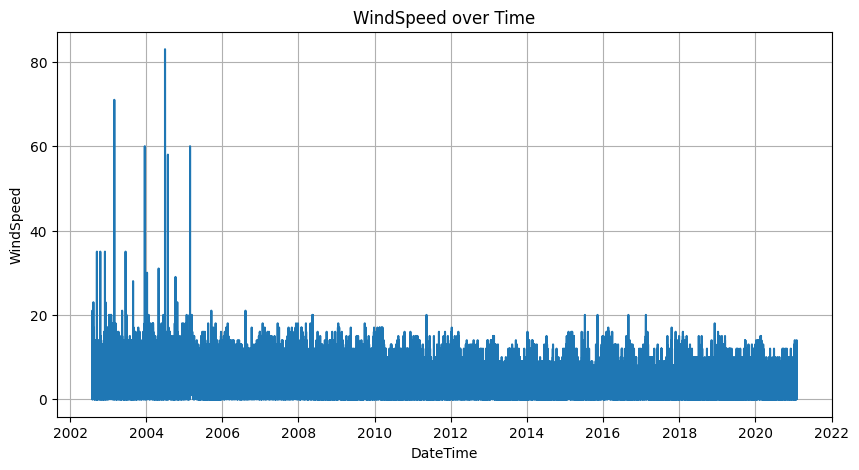

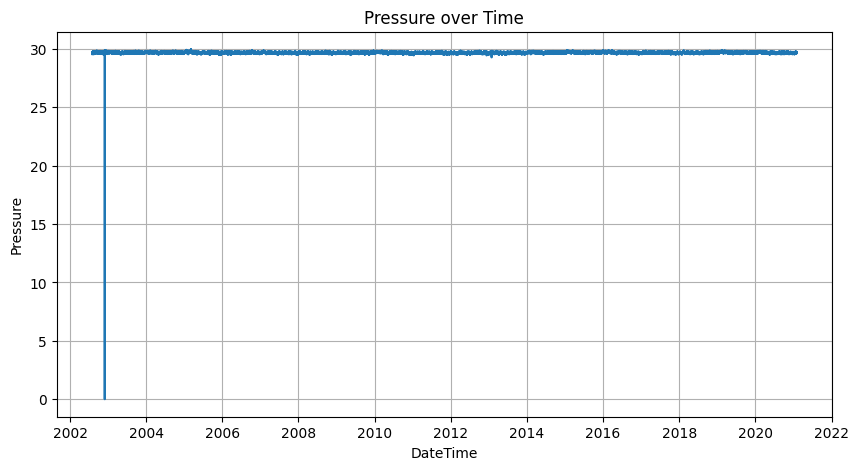

In [30]:
# Include only the numerical values
numerical_df = df.select_dtypes(include=['number'])

# Display the first few rows of the numerical dataframe
print(numerical_df.head())

for column in numerical_df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(numerical_df.index, numerical_df[column])
    plt.title(f'{column} over Time')
    plt.xlabel('DateTime')
    plt.ylabel(column)
    # plt.xlim(pd.Timestamp("2021-02-01"), pd.Timestamp("2022-02-01"))
    plt.grid(True)
    plt.show()

# Data Correlation Before Feature Engineering

             Rainfall     TOTAL  ClimAdjust      ANOM  Temperature  DewPoint  \
Rainfall     1.000000 -0.016776   -0.015639 -0.010195     0.009587  0.018295   
TOTAL       -0.016776  1.000000    0.481811  0.864449     0.149300  0.144304   
ClimAdjust  -0.015639  0.481811    1.000000 -0.023984     0.138388  0.233094   
ANOM        -0.010195  0.864449   -0.023984  1.000000     0.091165  0.030996   
Temperature  0.009587  0.149300    0.138388  0.091165     1.000000  0.269313   
DewPoint     0.018295  0.144304    0.233094  0.030996     0.269313  1.000000   
Humidity    -0.005761 -0.071951   -0.012778 -0.074936    -0.863652  0.237250   
WindSpeed    0.071816 -0.010687   -0.128279  0.061001     0.314902 -0.175285   
Pressure    -0.037420  0.105969   -0.039842  0.143694    -0.152975 -0.118578   

             Humidity  WindSpeed  Pressure  
Rainfall    -0.005761   0.071816 -0.037420  
TOTAL       -0.071951  -0.010687  0.105969  
ClimAdjust  -0.012778  -0.128279 -0.039842  
ANOM        -0.0749

<Axes: >

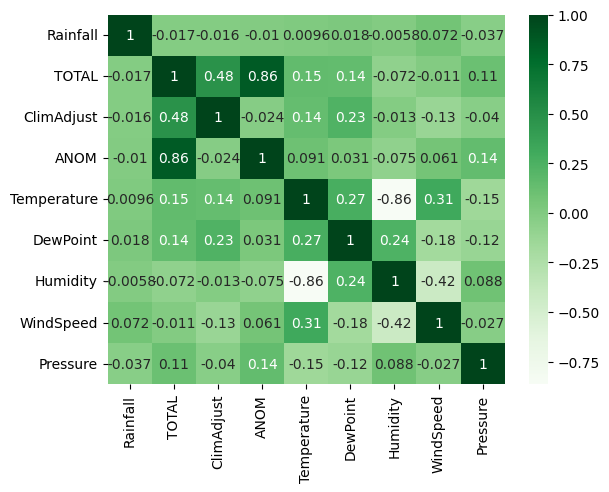

In [31]:
import seaborn as sns

corr_matrix = numerical_df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, cmap="Greens", annot=True)

# Feature Engineering


In [32]:
# Define the sets of features for interaction
interact1 = ['Rainfall', 'TOTAL', 'ClimAdjust', 'ANOM']
interact2 = ['Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'Pressure']

# Create interaction features
for feature1 in interact1:
    for feature2 in interact2:
        interaction_term = f'{feature1}_{feature2}'
        df[interaction_term] = df[feature1] * df[feature2]

print(df.columns.to_list())

['Rainfall', 'TOTAL', 'ClimAdjust', 'ANOM', 'Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'Pressure', 'Wind', 'Condition', 'Rainfall_Temperature', 'Rainfall_DewPoint', 'Rainfall_Humidity', 'Rainfall_WindSpeed', 'Rainfall_Pressure', 'TOTAL_Temperature', 'TOTAL_DewPoint', 'TOTAL_Humidity', 'TOTAL_WindSpeed', 'TOTAL_Pressure', 'ClimAdjust_Temperature', 'ClimAdjust_DewPoint', 'ClimAdjust_Humidity', 'ClimAdjust_WindSpeed', 'ClimAdjust_Pressure', 'ANOM_Temperature', 'ANOM_DewPoint', 'ANOM_Humidity', 'ANOM_WindSpeed', 'ANOM_Pressure']


In [33]:
# Create rolling statistics for 24, 48, 72 hours (1, 2, 3 days)
for window in [24,48,72]:
    df[f"Rainfall_{window}h_mean"] = df["Rainfall"].rolling(window).mean()
    df[f"Rainfall_{window}h_std"] = df["Rainfall"].rolling(window).std()
    df[f"Rainfall_{window}h_sum"] = df["Rainfall"].rolling(window).sum()

In [34]:
for lag in range(1, 73):
    df[f'Rainfall_lag_{lag}'] = df['Rainfall'].shift(lag)

C:\Users\User\AppData\Local\Temp\ipykernel_1296\404328818.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Rainfall_lag_{lag}'] = df['Rainfall'].shift(lag)
C:\Users\User\AppData\Local\Temp\ipykernel_1296\404328818.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Rainfall_lag_{lag}'] = df['Rainfall'].shift(lag)
C:\Users\User\AppData\Local\Temp\ipykernel_1296\404328818.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

In [35]:
df.dropna(inplace=True)

                 Rainfall     TOTAL  ClimAdjust      ANOM  Temperature  \
Rainfall         1.000000 -0.016844   -0.015622 -0.010282     0.009487   
TOTAL           -0.016844  1.000000    0.481971  0.864425     0.149314   
ClimAdjust      -0.015622  0.481971    1.000000 -0.023848     0.138447   
ANOM            -0.010282  0.864425   -0.023848  1.000000     0.091150   
Temperature      0.009487  0.149314    0.138447  0.091150     1.000000   
...                   ...       ...         ...       ...          ...   
Rainfall_lag_68  0.006016 -0.015939   -0.015642 -0.009251     0.091405   
Rainfall_lag_69  0.019626 -0.015956   -0.015678 -0.009249     0.089791   
Rainfall_lag_70  0.026678 -0.015959   -0.015682 -0.009251     0.078016   
Rainfall_lag_71  0.031093 -0.015957   -0.015699 -0.009239     0.059371   
Rainfall_lag_72  0.034548 -0.015969   -0.015731 -0.009234     0.034310   

                 DewPoint  Humidity  WindSpeed  Pressure  \
Rainfall         0.018361 -0.005629   0.071752 -0.0

<Axes: >

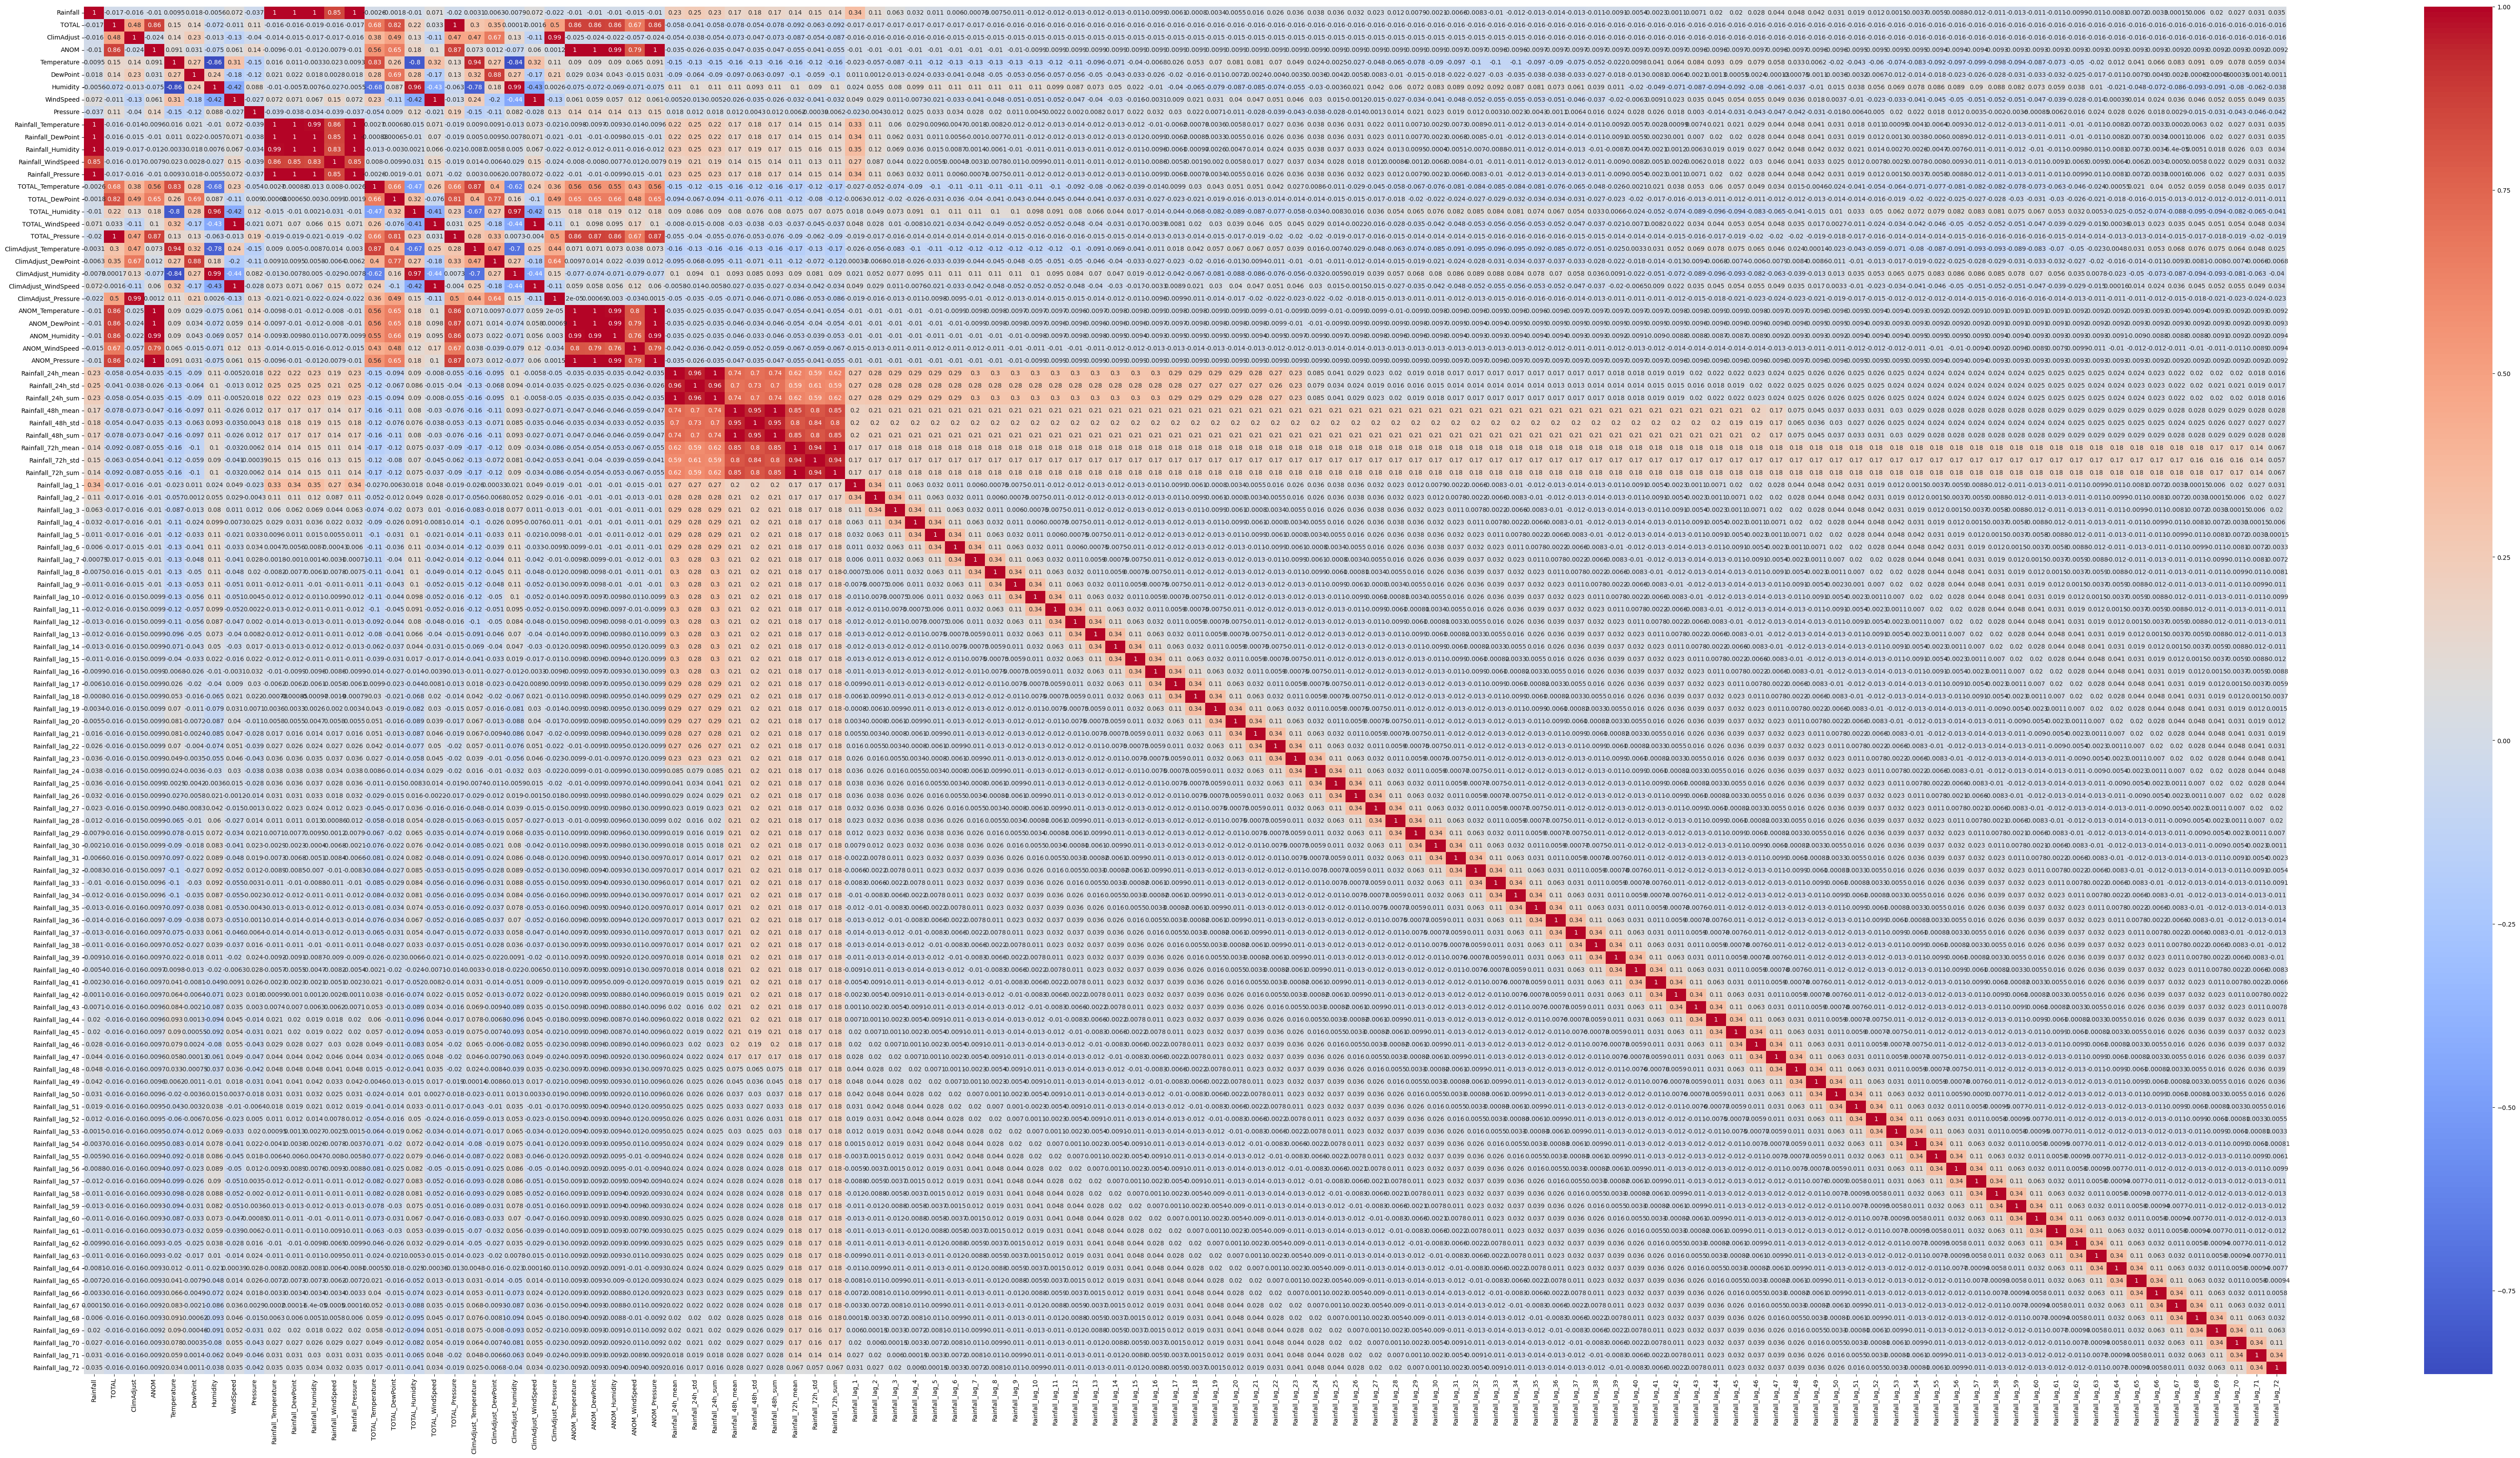

In [36]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

plt.figure(figsize=(80,40))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Dimensionality Reduction

In [37]:
# Dimensionality Reduction
low_corr_features = corr_matrix['Rainfall'][corr_matrix['Rainfall'].abs() < 0.1].index.tolist()
print(f"Features with low correlation to Rainfall: {low_corr_features}")

Features with low correlation to Rainfall: ['TOTAL', 'ClimAdjust', 'ANOM', 'Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'Pressure', 'TOTAL_Temperature', 'TOTAL_DewPoint', 'TOTAL_Humidity', 'TOTAL_WindSpeed', 'TOTAL_Pressure', 'ClimAdjust_Temperature', 'ClimAdjust_DewPoint', 'ClimAdjust_Humidity', 'ClimAdjust_WindSpeed', 'ClimAdjust_Pressure', 'ANOM_Temperature', 'ANOM_DewPoint', 'ANOM_Humidity', 'ANOM_WindSpeed', 'ANOM_Pressure', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5', 'Rainfall_lag_6', 'Rainfall_lag_7', 'Rainfall_lag_8', 'Rainfall_lag_9', 'Rainfall_lag_10', 'Rainfall_lag_11', 'Rainfall_lag_12', 'Rainfall_lag_13', 'Rainfall_lag_14', 'Rainfall_lag_15', 'Rainfall_lag_16', 'Rainfall_lag_17', 'Rainfall_lag_18', 'Rainfall_lag_19', 'Rainfall_lag_20', 'Rainfall_lag_21', 'Rainfall_lag_22', 'Rainfall_lag_23', 'Rainfall_lag_24', 'Rainfall_lag_25', 'Rainfall_lag_26', 'Rainfall_lag_27', 'Rainfall_lag_28', 'Rainfall_lag_29', 'Rainfall_lag_30', 'Rainfall_lag_31', 'Rainfall_lag_3

In [38]:
df_dim_red = df.drop(columns=low_corr_features)

                      Rainfall  Rainfall_Temperature  Rainfall_DewPoint  \
Rainfall              1.000000              0.999195           0.999696   
Rainfall_Temperature  0.999195              1.000000           0.999365   
Rainfall_DewPoint     0.999696              0.999365           1.000000   
Rainfall_Humidity     0.995369              0.991290           0.995164   
Rainfall_WindSpeed    0.853367              0.856284           0.850607   
Rainfall_Pressure     0.999998              0.999158           0.999678   
Rainfall_24h_mean     0.225070              0.222544           0.224282   
Rainfall_24h_std      0.252687              0.251193           0.252285   
Rainfall_24h_sum      0.225070              0.222544           0.224282   
Rainfall_48h_mean     0.169269              0.167026           0.168483   
Rainfall_48h_std      0.184566              0.183281           0.184217   
Rainfall_48h_sum      0.169269              0.167026           0.168483   
Rainfall_72h_mean     0.1

<Axes: >

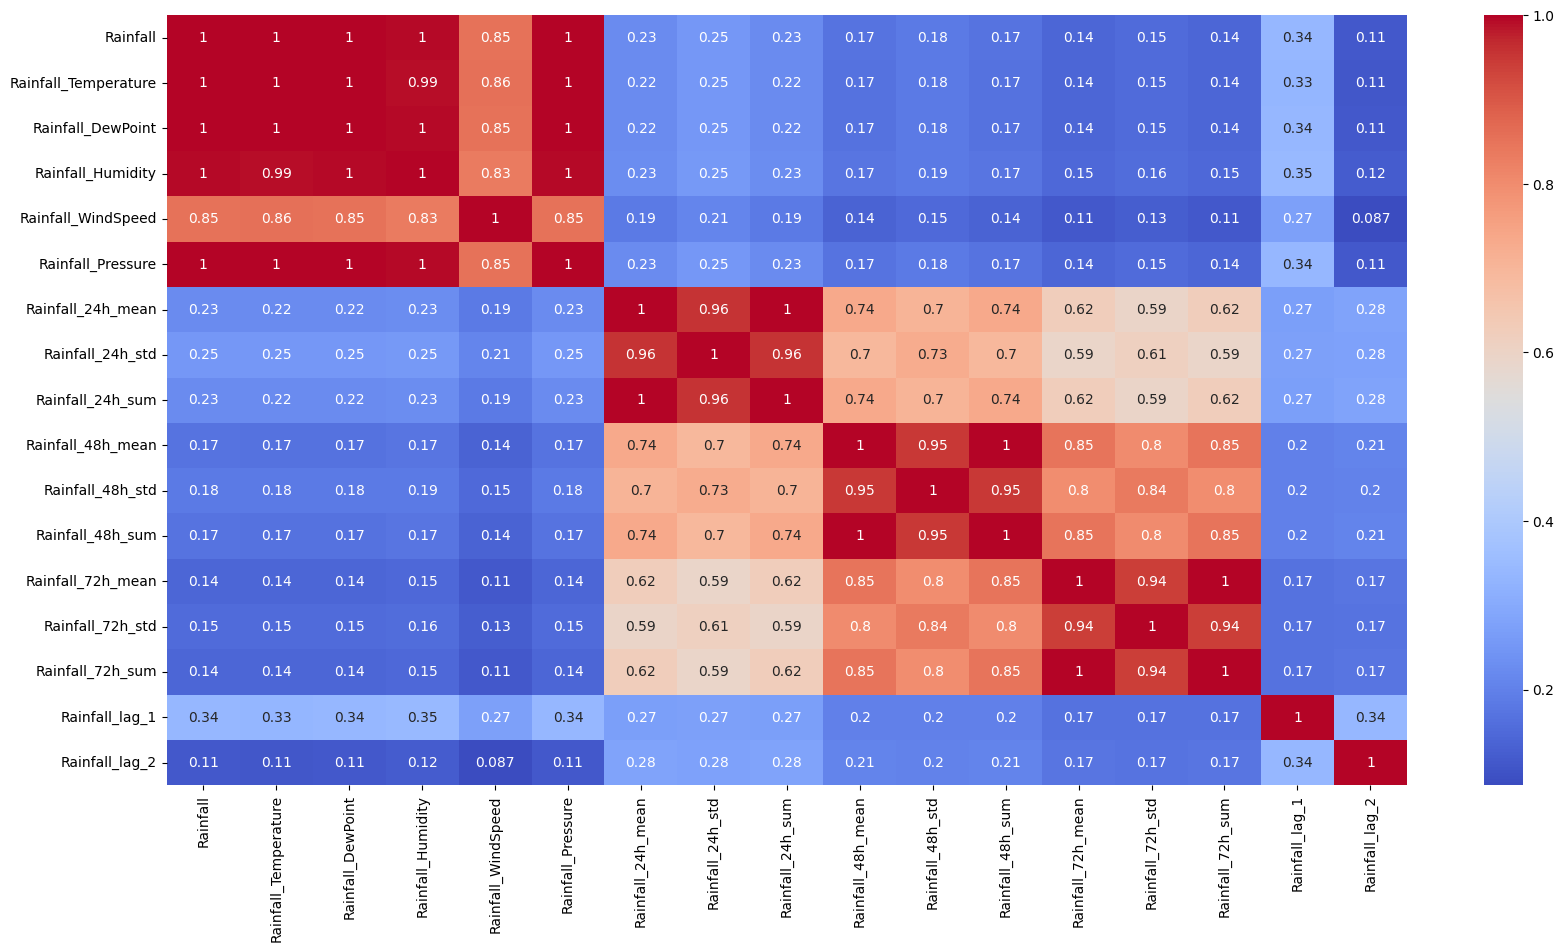

In [39]:
corr_matrix = df_dim_red.corr(numeric_only=True)
print(corr_matrix)

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# LSTM Model Univariate

In [ ]:
# new
df_uni = df.copy()
df_uni.drop(df_uni.iloc[:,1:9], axis=1, inplace=True)
df_uni

timesteps = 72
for lag in range(1, timesteps + 1):
    df_uni[f'Rainfall_lag{lag}'] = df_uni['Rainfall'].shift(lag)

df_uni = df_uni.dropna().reset_index(drop=True)

In [ ]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

# df_uni = scaler.fit_transform(df_uni)
# X = scaler.fit_transform(df_uni.values[:, 1:])
# y = scaler.fit_transform(df_uni.values[:, 0].reshape(-1, 1))
df_uni = scaler.fit_transform(df_uni)
X = df_uni[:, 1:]
y = df_uni[:, 0]
X = X.reshape((X.shape[0], timesteps, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


# model = Sequential([
#     LSTM(64, input_shape=(timesteps, 1)),
#     Dropout(0.2),
#     Dense(1, activation='relu')
# ])

model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=True),
    Dropout(0.2),
    Dense(1, activation='relu')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001)

model.compile(optimizer= "adam", loss='mae', metrics=['mse'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=300, 
                    batch_size=32, 
                    callbacks=[early_stopping])

In [ ]:
from sklearn.metrics import root_mean_squared_error,r2_score
import numpy as np
# Evaluate the model
y_pred = model.predict(X_test)

# Inverse transform to original scale
# y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df_uni.shape[1] - 1))], axis=1))[:, 0]
# y_pred_inv = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], df_uni.shape[1] - 1))], axis=1))[:, 0]

# bias = y_test_inv.mean() - y_pred_inv.mean()
# y_pred_inv_corrected = y_pred_inv + bias

# Calculate metrics
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Rainfall")
plt.plot(y_pred, label="Predicted Rainfall")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()

In [ ]:
model.save("lstm_univariate.h5")

# LSTM Model Multivariate

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LeakyReLU
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [41]:
# Scaling the features and target
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_dim_red.select_dtypes(include=['number']))

# Create lagged features
def create_lagged_features(data, num_lags):
    X, y = [], []
    for i in range(num_lags, len(data)):
        X.append(data[i-num_lags:i])
        y.append(data[i, 0])  # Assuming 'Rainfall' is the first column
    return np.array(X), np.array(y)

num_lags = 180  # Number of lagged values to use for forecasting
X, y = create_lagged_features(data_scaled, num_lags)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=False)

In [44]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True, input_shape=(num_lags, X.shape[2]), kernel_regularizer=l2(0.01))))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(units=32, kernel_regularizer=l2(0.01)))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.1))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer= optimizer, loss='mean_absolute_error', metrics=['mse'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 812s 284ms/step - loss: 0.2570 - mse: 5.4802e-04 - val_loss: 0.0034 - val_mse: 5.2600e-04
Epoch 2/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 813s 287ms/step - loss: 0.0035 - mse: 4.9272e-04 - val_loss: 0.0035 - val_mse: 5.2608e-04
Epoch 3/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 808s 285ms/step - loss: 0.0037 - mse: 5.3478e-04 - val_loss: 0.0034 - val_mse: 5.2599e-04
Epoch 4/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 815s 288ms/step - loss: 0.0033 - mse: 4.7722e-04 - val_loss: 0.0034 - val_mse: 5.2588e-04
Epoch 5/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 817s 288ms/step - loss: 0.0035 - mse: 5.0478e-04 - val_loss: 0.0035 - val_mse: 5.2655e-04
Epoch 6/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 862s 288ms/step - loss: 0.0035 - mse: 5.0470e-04 - val_loss: 0.0034 - val_mse: 5.2559e-04
Epoch 7/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 814s 287ms/step - loss: 0.0034 - mse: 4.8473e-04 - val_loss: 0.0035 - val_mse: 5.2621e-04
Epoch 8/1000
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 820s 289ms/step - 

In [ ]:
y_pred = model.predict(x_test)
y_pred_rescaled = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], data_scaled.shape[1] - 1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1))[:, 0]

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual Rainfall')
plt.plot(y_pred_rescaled, label='Predicted Rainfall', alpha=0.7)
plt.xlabel('Day')
plt.ylabel('Rainfall')
# plt.xlim((1750,2000))
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()